In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\UIUC\\IS477\\IS477_final_project\\data\\processed\\final_cleaned_data.csv')
df.head()

,pin,year,township_code,nbhd,class,sale_date,is_mydec_date,sale_price,doc_no,deed_type,...,sale_filter_same_sale_within_365,sale_filter_less_than_10k,sale_filter_deed_type,row_id,pin10,lon,lat,nearest_cta_stop,nearest_cta_lines,min_distance_meters
0,25101170110000,2024.0,70,70111,203,2024-01-25,True,299900.0,2.402913e+09,Trustee,...,False,False,False,7573642,2510117011,-87.616102,41.717261,95th/Dan Ryan,Red Line,1084.531512
1,20341010100000,2024.0,70,70111,203,2024-01-11,True,237000.0,2.401813e+09,Warranty,...,False,False,False,7573654,2034101010,-87.622505,41.750465,79th,Red Line,297.112480
2,20341160330000,2024.0,70,70111,202,2024-01-18,True,210000.0,2.402922e+09,Warranty,...,False,False,False,7573664,2034116033,-87.616877,41.745848,79th,Red Line,1052.560269
3,26062140230000,2024.0,70,70100,202,2024-01-15,True,75000.0,2.402513e+09,Warranty,...,False,False,False,7573711,2606214023,-87.555053,41.732083,87th,Red Line,7753.084750
4,20343060060000,2024.0,70,70111,205,2024-01-03,True,155000.0,2.401228e+09,Warranty,...,False,False,False,7573712,2034306006,-87.623879,41.741335,87th,Red Line,669.710063


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42234 entries, 0 to 42233
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pin                               42234 non-null  int64  
 1   year                              42234 non-null  float64
 2   township_code                     42234 non-null  int64  
 3   nbhd                              42234 non-null  int64  
 4   class                             42234 non-null  int64  
 5   sale_date                         42234 non-null  object 
 6   is_mydec_date                     42234 non-null  bool   
 7   sale_price                        42234 non-null  float64
 8   doc_no                            42234 non-null  float64
 9   deed_type                         42234 non-null  object 
 10  mydec_deed_type                   41796 non-null  object 
 11  seller_name                       42078 non-null  object 
 12  is_m

##### Research Question
1. Is there a statistically significant correlation between the Euclidean distance of a residential property from the nearest active CTA rail station and its adjusted sale price per square foot?

`min_distance_meters`, `sale_price`

In [4]:
df[['min_distance_meters', 'sale_price']].corr()

,min_distance_meters,sale_price
min_distance_meters,1.000000,-0.231542
sale_price,-0.231542,1.000000


- With `min_distance_meters` increases by 1 unit, `sale_price` will decrease for 0.23 unit. 
- Weak relationship

2. How does the transit line color (e.g., Red Line vs. Brown Line) influence the magnitude of this correlation?

`nearest_cta_lines`, `sale_price`

In [5]:
df_lines = df[['min_distance_meters','nearest_cta_lines', 'sale_price']]
df_lines.head()

,min_distance_meters,nearest_cta_lines,sale_price
0,1084.531512,Red Line,299900.0
1,297.112480,Red Line,237000.0
2,1052.560269,Red Line,210000.0
3,7753.084750,Red Line,75000.0
4,669.710063,Red Line,155000.0


In [6]:
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].astype('string')
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].fillna('nan')
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].apply(lambda x: x.lower())
df_lines['nearest_cta_lines'].unique()

array(['red line', 'green line', 'green line (lake)',
       "blue line (o'hare)", 'blue line', 'brown line', 'yellow line',
       'orange line', 'green line (englewood)', 'brown, purple (express)',
       'red, brown, purple (express)', 'pink line',
       'blue line (congress)', 'purple line, evanston express',
       'red, yellow, purple, evanston express', 'orange & green lines',
       'brown, orange, pink,  purple (express), green',
       'green (lake), pink', 'brown, orange, pink, purple (express)',
       'purple, red line',
       'brown, orange, pink, purple (express), green, blue', 'nan'],
      dtype=object)

In [7]:
df_lines['contains_red'] = df_lines['nearest_cta_lines'].str.contains('red', case=False, na=False)
df_lines['contains_green'] = df_lines['nearest_cta_lines'].str.contains('green', case=False, na=False)
df_lines['contains_blue'] = df_lines['nearest_cta_lines'].str.contains('blue', case=False, na=False)
df_lines['contains_brown'] = df_lines['nearest_cta_lines'].str.contains('brown', case=False, na=False)
df_lines['contains_yellow'] = df_lines['nearest_cta_lines'].str.contains('yellow', case=False, na=False)
df_lines['contains_orange'] = df_lines['nearest_cta_lines'].str.contains('orange', case=False, na=False)
df_lines['contains_purple'] = df_lines['nearest_cta_lines'].str.contains('purple', case=False, na=False)
df_lines['contains_pink'] = df_lines['nearest_cta_lines'].str.contains('pink', case=False, na=False)
df_lines['contains_evanston'] = df_lines['nearest_cta_lines'].str.contains('evanston', case=False, na=False)
df_lines.head()

,min_distance_meters,nearest_cta_lines,sale_price,contains_red,contains_green,contains_blue,contains_brown,contains_yellow,contains_orange,contains_purple,contains_pink,contains_evanston
0,1084.531512,red line,299900.0,True,False,False,False,False,False,False,False,False
1,297.112480,red line,237000.0,True,False,False,False,False,False,False,False,False
2,1052.560269,red line,210000.0,True,False,False,False,False,False,False,False,False
3,7753.084750,red line,75000.0,True,False,False,False,False,False,False,False,False
4,669.710063,red line,155000.0,True,False,False,False,False,False,False,False,False


In [8]:
df_lines['line_num'] = df_lines['nearest_cta_lines'].str.count(',')
df_lines['line_num'] = df_lines['line_num'] + 1
df_lines.loc[df_lines['nearest_cta_lines'] == 'orange & green lines', 'line_num'] = 2
df_lines.loc[df_lines['nearest_cta_lines'] == 'nan', 'line_num'] = 0

In [9]:
df_lines['line_num'].value_counts()

line_num
1    23181
0    15988
2     2169
3      406
5      284
4      180
6       26
Name: count, dtype: int64

In [10]:
df_lines[['contains_red','sale_price']].corr()

,contains_red,sale_price
contains_red,1.000000,0.048196
sale_price,0.048196,1.000000


In [11]:
df_lines[['contains_green','sale_price']].corr()

,contains_green,sale_price
contains_green,1.000000,0.046443
sale_price,0.046443,1.000000


In [12]:
df_lines[['contains_blue','sale_price']].corr()

,contains_blue,sale_price
contains_blue,1.000000,0.045737
sale_price,0.045737,1.000000


In [13]:
df_lines[['contains_brown','sale_price']].corr()

,contains_brown,sale_price
contains_brown,1.000000,0.021425
sale_price,0.021425,1.000000


In [14]:
df_lines[['contains_yellow','sale_price']].corr()

,contains_yellow,sale_price
contains_yellow,1.000000,0.018236
sale_price,0.018236,1.000000


In [15]:
df_lines[['contains_orange','sale_price']].corr()

,contains_orange,sale_price
contains_orange,1.000000,0.036984
sale_price,0.036984,1.000000


In [16]:
df_lines[['contains_purple','sale_price']].corr()

,contains_purple,sale_price
contains_purple,1.000000,0.023047
sale_price,0.023047,1.000000


In [17]:
df_lines[['line_num','sale_price']].corr()

,line_num,sale_price
line_num,1.000000,0.106675
sale_price,0.106675,1.000000


- Weak positive correlation between different types of line and sale price 
- Generally weak positive correlation between number of lines for each stop and sale price

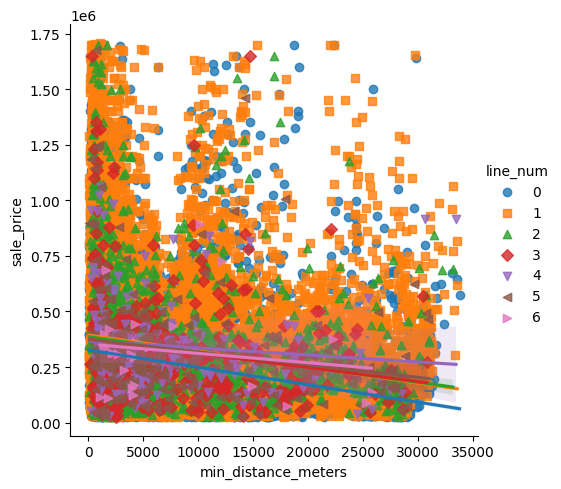

In [18]:
sns.lmplot(x="min_distance_meters", y="sale_price", hue='line_num',data=df_lines,markers=['o', 's', '^', 'D', 'v', '<', '>'])
plt.show()

- Weak negative relation in general

3. How do Residense Property Class and Minimum distance to the CTA station influence the sale price? Is there a strong correlation?

`class`, `min_distance_meters`, `sale_price`


In [19]:
df['class'] = df['class'].astype(str) # originally int, change to str
df['class'].unique()

array(['203', '202', '205', '206', '204', '207', '208', '209'],
      dtype=object)

2-02 One-story Residence, any age, up to 999 square feet 

2-03 One-story Residence, any age, 1,000 to 1,800 square feet 

2-04 One-story Residence, any age, 1,801 square feet and over 

2-05 Two-or-more story residence, over 62 years of age up to 2,200 square feet 

2-06 Two-or-more story residence, over 62 years of age, 2,201 to 4,9999 square feet 

2-07 Two-or-more story residence, up to 62 years of age, and up to 2,000 square feet 

2-08 Two-or-more story residence, up to 62 years of age, 3,801 to 4,999 square feet 

2-09 Two-or-more story residence, any age, 5,000 square feet and over 

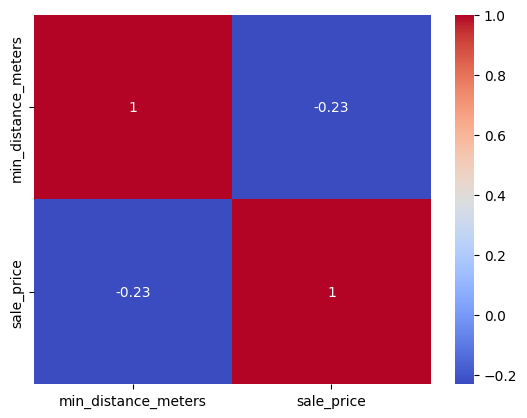

In [24]:
corr = df[['class', 'min_distance_meters', 'sale_price']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

|r| < 0.8, no potential multicollinearity concerns

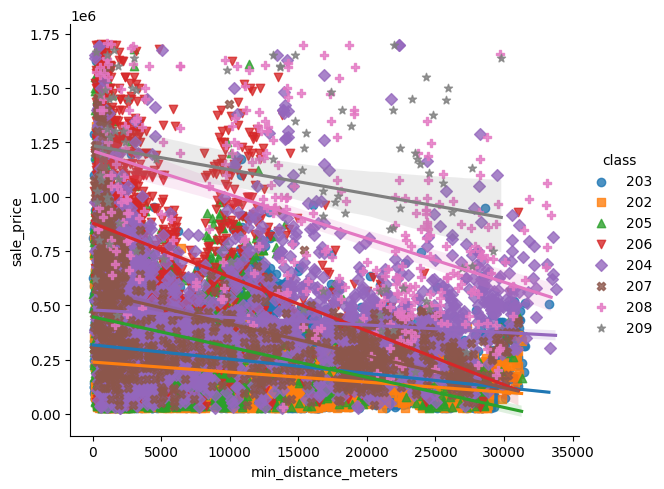

In [20]:
sns.lmplot(
    data=df,
    x='min_distance_meters',
    y='sale_price',
    hue='class',   # color by category
    markers=['o', 's', '^', 'v', 'D', 'X', 'P', '*'], # optional
    aspect=1.2
)
plt.show()


In [26]:
# use Q("class") to avoid type error
model = smf.ols('sale_price ~ min_distance_meters * Q("class")', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1816.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:51:45   Log-Likelihood:            -5.7221e+05
No. Observations:               42234   AIC:                         1.144e+06
Df Residuals:                   42218   BIC:                         1.145e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2.384e+05   2844.405     83.808      0.000    2.33e+05    2.44e+05
Q("class")[T.203]                      7.912e+04   3388.461     23.350      0.000    7.25e+04    8.58e+04
Q("class")[T.204]                      2.399e+05   6384.599     37.571      0.000    2.27e+05    2.52e+05
Q("class")[T.205]                      2.082e+05   4303.206     48.374      0.000       2e+05    2.17e+05
Q("class")[T.206]                        6.4e+05   6218.298    102.923      0.000    6.28e+05    6.52e+05
Q("class")[T.207]                      3.238e+05   8739.001     37.054      0.000    3.07e+05    3.41e+05
Q("class")[T.208]                      9.723e+05    2.1e+04     46.247      0.000    9.31e+05    1.01e+06
Q("class")[T.209]                      9.965e+05   3.33e+04     29.882      0.000    9.31e+05    1.06e+06
min_distance_meters                      -4.6203      0.258    -17.917      0.000      -5.126      -4.115
min_distance_meters:Q("class")[T.203]    -1.9270      0.311     -6.201      0.000      -2.536      -1.318
min_distance_meters:Q("class")[T.204]     1.1618      0.474      2.451      0.014       0.233       2.091
min_distance_meters:Q("class")[T.205]    -9.2743      0.546    -16.981      0.000     -10.345      -8.204
min_distance_meters:Q("class")[T.206]   -20.2022      0.847    -23.847      0.000     -21.863     -18.542
min_distance_meters:Q("class")[T.207]   -10.1064      0.647    -15.613      0.000     -11.375      -8.838
min_distance_meters:Q("class")[T.208]   -15.5218      1.120    -13.862      0.000     -17.716     -13.327
min_distance_meters:Q("class")[T.209]    -6.4641      1.988     -3.251      0.001     -10.361      -2.567
==============================================================================
Omnibus:                    10863.982   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55240.865
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                       8.106   Cond. No.                     4.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 0.392 R^2 => moderate explanatory level
- F-statistic = 1816, p = 0.000 => statistically significant
- Q("class")[T.xxx] => price higher than the baseline (intercept), all positive, large $$
- `min_distance_meters` => $-4.6 effect
- `min_distance_meters:Q("class")[T.xxx]` shows how much the slope differs from the baseline.
    - `min_distance_meters:Q("class")[T.206]` steepest
    - `min_distance_meters:Q("class")[T.204]` most flattened